In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from keras.preprocessing import image


Using TensorFlow backend.
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\zeesh\anaco

In [2]:
p=Path(r"C:\Users\zeesh\OneDrive\Desktop\pokemon_classification\datasets")
dirs=p.glob("*")
print(dirs)

<generator object Path.glob at 0x0000026D0D752228>


In [3]:
image_data=[]
labels_dict={"Bulbasaur":0 , "Charmander":1 , "Pikachu":2}
label2pokemon={0:"Bulbasaur", 1 :"Charmander", 2:"Pikachu"}
labels=[]

In [4]:
for folder_dir in dirs:
    label=str(folder_dir).split("\\")[-1]
    print(label)
    cnt=0
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(100,100))
        image_arr=image.img_to_array(img)
        image_data.append(image_arr)
        labels.append(labels_dict[label])
        cnt+=1
    print(cnt)    

Bulbasaur
111
Charmander
146
Pikachu
117


In [5]:
print(len(image_data))
print(len(labels))

374
374


In [6]:
x=np.array(image_data)
y=np.array(labels)

#normlise
x=x/255.0
print(x.shape)
print(y.shape)

(374, 100, 100, 3)
(374,)


In [7]:
def drawImg(x,labels):
    plt.imshow(x)
    plt.title(label2pokemon[labels])
    plt.style.use("seaborn")
    plt.show()

In [8]:
from sklearn.utils import shuffle
x,y=shuffle(x,y,random_state=2)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(299, 100, 100, 3) (299,)
(75, 100, 100, 3) (75,)


In [10]:
def softmax(a):
    e=np.exp(a)
    ans=e/np.sum(e,axis=1,keepdims=True)
    return ans

In [11]:
class NeuralNetwork():
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        #first layer
        model['w1']=np.random.randn(input_size,layers[0])  ##3,4
        model['b1']=np.zeros((1,layers[0]))    ##1,4
        
        model['w2']=np.random.randn(layers[0],layers[1])  ##4,3
        model['b2']=np.zeros((1,layers[1]))         ##1,3
        
        model['w3']=np.random.randn(layers[1],output_size)  ##4,2
        model['b3']=np.zeros((1,output_size))      ###1,2
        #self.activation_output=()
        self.model=model
    def forward(self,x):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,w1) + b1    #x--> m,n w1-->n,layer1   ======m,4 +   1,4
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2) + b2  
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3) + b3
        y_=softmax(z3)
        self.activation_output=(a1,a2,y_)
        #print(y_.shape)
        return y_
    def backward(self,x,y,learning_rate):
        w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_=self.activation_output
        m=x.shape[0]
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,w3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,w2.T)
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        ###update
        self.model['w1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['w2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['w3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        print(y_out.shape )
        return np.argmax(y_out,axis=1)      
   

In [12]:
def summary(self):
    w1,w2,w3=self.model['w1'],self.model['w2'],self.model['w3']
    a1,a2,y_=self.activation_output
        
    print("w1"%w1.shape)
    print("a1"%a1.shape)
        
    print("w2"%w2.shape)
    print("a2"%a2.shape)
              
    print("w3"%w3.shape)
    print("y_"%y_.shape)
    
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
def onehot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [13]:
def train(x,y,model,epochs,learning_rate):
    training_loss=[]
    classes=3
    y_oht=onehot(y,classes)
    
    for ix in range(epochs):
        Y_=model.forward(x)
        l=loss(y_oht,Y_)
        training_loss.append(l)
        model.backward(x,y_oht,learning_rate)
        
    return training_loss        
        

In [14]:
model=NeuralNetwork(input_size=30000,layers=[100,50],output_size=3)


In [15]:
xtrain=xtrain.reshape(xtrain.shape[0],-1)
ytrain=ytrain.reshape(ytrain.shape[0],-1)
xtest=xtest.reshape(xtest.shape[0],-1)
ytest=ytest.reshape(ytest.shape[0],-1)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(299, 30000) (299, 1)
(75, 30000) (75, 1)


In [16]:
l=train(xtrain,ytrain,model,500,0.0002)

c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
c:\users\zeesh\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


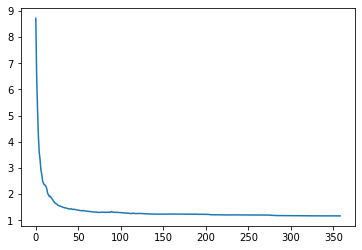

In [17]:
plt.plot(l)
plt.show()

In [18]:
print(l)

[8.719030411863644, 6.538752670792522, 5.313229687479574, 4.262247543682777, 3.599319838798477, 3.3314389696517566, 2.9207710754982443, 2.7639557384537525, 2.508815039059061, 2.415950045202905, 2.3569181433304496, 2.346838768061712, 2.292012026819177, 2.1952806400212186, 2.0253143539942275, 1.972710832341914, 1.9067389192265836, 1.9176186355241398, 1.8655934959183864, 1.8244347933896128, 1.7763704442673287, 1.7297552717115419, 1.688325736688936, 1.6486204988984674, 1.632562614997831, 1.6110330640253032, 1.573515310133807, 1.56187060342589, 1.5459118329016996, 1.5359657263140514, 1.5237007115842296, 1.5189762332916215, 1.5025267370602633, 1.492576023200881, 1.477366335201408, 1.475306109454324, 1.4703183205340218, 1.454035403627672, 1.443905110101542, 1.4388959343977061, 1.4298169683633906, 1.4305166655335835, 1.4399371555646052, 1.4187253734549758, 1.4172285628558106, 1.423454816841356, 1.4152224173305508, 1.4052161921374253, 1.3980586013722598, 1.3914897299596698, 1.3908163707561332, 

In [24]:
output=model.predict(xtrain)
acc=np.sum(output==ytrain)/float(ytrain.shape[0])
print(acc)

(299, 3)
82.0
